In [1]:
###Visualisation and pre-processing of data

In [2]:
#preliminaries
import pandas as pd
import numpy as np
import os

%matplotlib inline
import matplotlib.pyplot as plt

# Set matplotlib parameters
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# to make this notebook's output stable across runs
np.random.seed(42)


In [3]:
#Load data from URLs
# Import package
from urllib.request import urlretrieve

# Assign url of file: url
url = '/Users/martabatlle/Desktop/mammographic_masses.data.txt'

# Read file into a DataFrame and print its head
cols = ['birads', 'age', 'shape', 'margin', 'density', 'severity']
dataframe = pd.read_csv(url, header=None, names=cols, index_col=False)
dataframe.head()

,birads,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [4]:
dataframe.isnull().sum() #how many are missing

birads      0
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

In [5]:
dtf= dataframe.replace('?',np.NaN)
dtf.head()

,birads,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1


In [6]:
dtf.isnull().sum() #how many are missing

birads       2
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [7]:
dtf2= dtf
dtf2.head()

,birads,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1


In [8]:
a = [x for x in dtf2['birads'] if float(x) > 5.0]
print (a) #birads has wrong values

['55', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6']


In [9]:
dtf2['birads']= dtf2.replace(a,np.NaN)
dtf2.head() #replace wrong values with NaN

,birads,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1


In [10]:
b = [x for x in dtf2['birads'] if float(x) == 0]
print (b) #birads has incomplete values

['0', '0', '0', '0', '0']


In [11]:
dtf2['birads']= dtf2.replace(b,np.NaN)
dtf2.head() #replace wrong values with NaN

,birads,age,shape,margin,density,severity
0,5,67,3,5,3,1
1,4,43,1,1,NaN,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,NaN,1


In [12]:
dtf2.isnull().sum() #how many are missing

#why does age take null values if I only added them to birads?

birads      19
age          5
shape       31
margin      48
density     76
severity     0
dtype: int64

In [13]:
from sklearn.preprocessing import Imputer

df_nan = Imputer(missing_values='NaN', strategy='median', axis=0)
df_nan = df_nan.fit(dtf2)
df = df_nan.transform(dtf2.values)
df= pd.DataFrame(df)
df.columns = ['birads', 'age', 'shape', 'margin', 'density', 'severity']
df.head()

,birads,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1.0
1,4.0,43.0,1.0,1.0,3.0,1.0
2,5.0,58.0,4.0,5.0,3.0,1.0
3,4.0,28.0,1.0,1.0,3.0,0.0
4,5.0,74.0,1.0,5.0,3.0,1.0


In [14]:
df.isnull().sum()

birads      0
age         0
shape       0
margin      0
density     0
severity    0
dtype: int64

In [15]:
describe= df.describe()
describe

,birads,age,shape,margin,density,severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.292404,55.495317,2.730489,2.806452,2.917794,0.463059
std,0.607963,14.442783,1.223552,1.527525,0.365869,0.498893
min,2.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [16]:
#Categorise variable age (Using quantiles as a reference for categorising)
#IMPROVE!!
a = [x for x in df.age if float(x) < 46]
b = [x for x in df.age if 45 < float(x) < 58]
c = [x for x in df.age if 57 < float(x) < 67]
d = [x for x in df.age if 66 < float(x) < 97]





In [17]:
df['age']= df['age'].replace(a,1)
df['age'].head()

0    67.0
1     1.0
2    58.0
3     1.0
4    74.0
Name: age, dtype: float64

In [18]:
df['age']= df['age'].replace(b,2)
df['age'].head()

0    67.0
1     1.0
2    58.0
3     1.0
4    74.0
Name: age, dtype: float64

In [19]:
df['age']= df['age'].replace(c,3)
df['age'].head()

0    67.0
1     1.0
2     3.0
3     1.0
4    74.0
Name: age, dtype: float64

In [20]:
df['age']= df['age'].replace(d,4)
df['age'].head()

0    4.0
1    1.0
2    3.0
3    1.0
4    4.0
Name: age, dtype: float64

In [21]:
describe= df.describe()
describe

,birads,age,shape,margin,density,severity
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,4.292404,2.444329,2.730489,2.806452,2.917794,0.463059
std,0.607963,1.102682,1.223552,1.527525,0.365869,0.498893
min,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,1.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,2.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,3.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000


In [22]:
#Extract features
birads= df.iloc[:,0].values #BI-RADS assessment (1 to 5 (ordinal))
age= df.iloc[:, 1].values #Age (in years 1=18 to 45, 2=46 to 57, 3=58 to 66, 4= 67 to 96)
shape= df.iloc[:, 2].values #Mass shape (round=1 oval=2 lobular=3 irregular=4 (nominal))
margin= df.iloc[:, 3].values #Mass margin (circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal))
density= df.iloc[:, 4].values #Mass density (high=1 iso=2 low=3 fat-containing=4 (ordinal))
severity= df.iloc[:, 5].values #Severity (benign=0 or malignant=1 (binominal))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109aff6d8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11008a7b8>]], dtype=object)

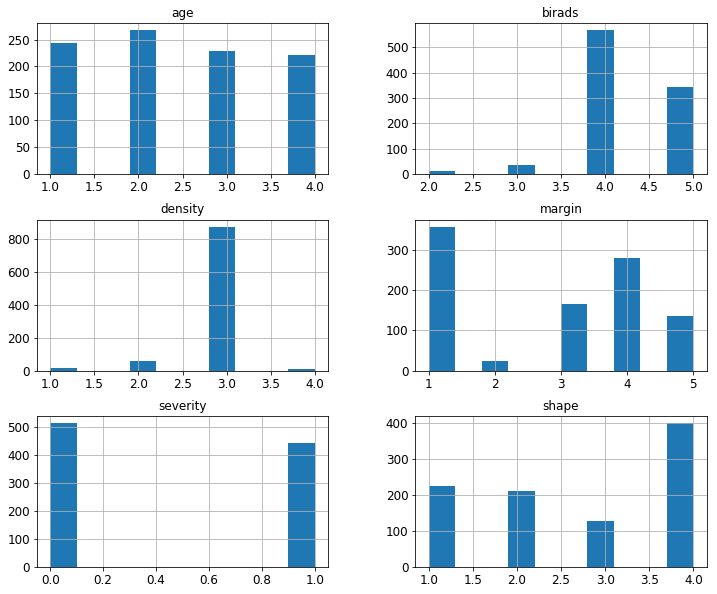

In [23]:
df.hist(figsize=(12,10))

In [24]:
df.severity.value_counts() 
# 1= number of malignant cases
#it is a balanced dataset

0.0    516
1.0    445
Name: severity, dtype: int64

In [25]:
#Frequency of density values
df.density.value_counts()

3.0    874
2.0     59
1.0     16
4.0     12
Name: density, dtype: int64

In [26]:
#Frequency of margin values
df.margin.value_counts()

1.0    357
4.0    280
3.0    164
5.0    136
2.0     24
Name: margin, dtype: int64

In [27]:
#Frequency of shape values
df['shape'].value_counts()

4.0    400
1.0    224
2.0    211
3.0    126
Name: shape, dtype: int64

In [28]:
#Frequency of BI-RADS values
df.birads.value_counts()

4.0    566
5.0    345
3.0     36
2.0     14
Name: birads, dtype: int64

In [29]:
#Change 0 to 1 in BI-RADS assessment (there are only 5 assessment levels which should go from 1 to 5)
df['birads']= df['birads'].replace(0,1)
df.birads.value_counts()

4.0    566
5.0    345
3.0     36
2.0     14
Name: birads, dtype: int64

In [30]:
#Frequency of BI-RADS values
df.birads.value_counts()

4.0    566
5.0    345
3.0     36
2.0     14
Name: birads, dtype: int64

In [31]:
#Frequency of age values
df.age.value_counts()

2.0    267
1.0    244
3.0    229
4.0    221
Name: age, dtype: int64

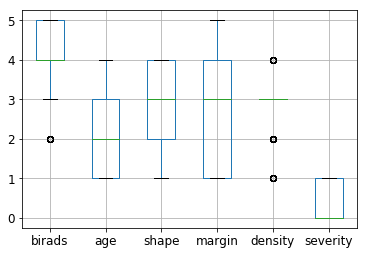

In [32]:
df.boxplot()

In [33]:
from mpl_toolkits.mplot3d import Axes3D


#feature1 = df['uniform_size'].values
#feature2 = df['uniform_shape'].values 
#feature3 = df['bland_chromatin'].values

#df['class']=df['class'].astype('str')

#c = df['class'].values
#df['class']=df['class'].astype('int')
#c[c=='0'] = 'b' #benign
#c[c=='1'] = 'r' #malignant

#fig = plt.figure(figsize=(14,8))
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(feature1, feature2, feature3, c=c)
#ax.set_xlabel('uniform_size')
#ax.set_ylabel('uniform_shape')
#ax.set_zlabel('bland_chromatin')

#plt.show()

In [34]:
corr= df.corr()
corr

,birads,age,shape,margin,density,severity
birads,1.000000,0.310987,0.453331,0.478263,0.084762,0.573125
age,0.310987,1.000000,0.343633,0.368364,0.015755,0.411413
shape,0.453331,0.343633,1.000000,0.718893,0.057495,0.552781
margin,0.478263,0.368364,0.718893,1.000000,0.094516,0.557867
density,0.084762,0.015755,0.057495,0.094516,1.000000,0.054681
severity,0.573125,0.411413,0.552781,0.557867,0.054681,1.000000


Text(0.5,1,'Correlation Matrix for the whole dataset')

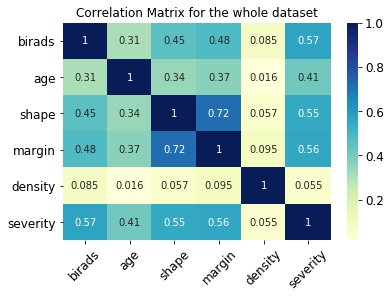

In [35]:
import seaborn as sns
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")
plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(18,12)
plt.title('Correlation Matrix for the whole dataset')
#The features that correlate the most with the outcome are birads, shape and margin
#Density seems to have a poor correlation with the outcome

In [36]:
#Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
x, y = df.iloc[:, 0:5].values, df.iloc[:, 5].values # 

x_train, x_test, y_train, y_test = \
        train_test_split(x, y, test_size=0.2, random_state=0)

    
#80% training data, 20% testing data


In [37]:
print ("number of instances for training: ", len(x_train))
print ("number of instances for testing: ", len(x_test))
x_train.shape, x_test.shape, y_train.shape, y_test.shape

number of instances for training:  768
number of instances for testing:  193


((768, 5), (193, 5), (768,), (193,))

In [38]:
#How to do Logistic Regression 

#from sklearn.linear_model import LogisticRegression
#log=LogisticRegression(penalty='l2',C=.01)
#log.fit(x_train,y_train)

In [39]:
###Selection of models and training of data

In [40]:
### Decision tree
from sklearn.tree import DecisionTreeClassifier

In [61]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)


In [42]:
#Train the decision tree
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [67]:
import sklearn.datasets as datasets

In [69]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [71]:
pip install pydot_ng


The following command must be run outside of the IPython shell:

    $ pip install pydot_ng

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/


In [64]:
import graphviz 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
dot_data=StringIO()
dot_data = export_graphviz(clf_dt, out_file = None, feature_names=cols, class_names=['negative', 'positive'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
#print(dot_data)
Image(graph.create_png())


ModuleNotFoundError: No module named 'graphviz'

In [ ]:
###Suport vector machine